# 用滤波器进行滤波，并与平均线对比效果


In [3]:
#常规库引用
import datetime
import tushare as ts
# import rqalpha_data
import pandas as pd
import numpy as np
import tushare as ts
import baostock as bs
import talib as talib
import seaborn as sns
from sklearn.externals import joblib   #保存模型方法
#保存模型
#joblib.dump(model,'rf.model')
#加载模型
#model=joblib.load('rf.model')

import math
import statsmodels.tsa.stattools as stattool
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (18.0, 6.0)

## 函数库

In [27]:
def pre(code):
    pcode='sh.'+code if code[0]=='6' else 'sz.'+code
    return pcode
def getDataFromTushare(code,start_date,end_date):
    price=ts.get_hist_data(code,start='2012-01-01',end='2019-04-30')
    return price
def getDataFromBaostock(code,start_date,end_date):
    lg = bs.login()
    print(pre(code))
    rs = bs.query_history_k_data_plus(pre(code),
        "date,code,open,high,low,close,preclose,volume,amount",
        start_date=start_date, end_date=end_date,
        frequency="d", adjustflag="3")
    #### 打印结果集 ####
    data_list = []
    while (rs.error_code == '0') & rs.next():
        # 获取一条记录，将记录合并在一起
        data_list.append(rs.get_row_data())
    result = pd.DataFrame(data_list, columns=rs.fields)


    bs.logout()
    return result

## 读取数据

In [29]:
code='000001'
start_date='2015-03-01'
end_date='2019-03-01'
price=getDataFromBaostock(code,start_date,end_date)
price.head()

login success!
sz.000001
logout success!


,date,code,open,high,low,close,preclose,volume,amount
0,2015-03-02,sz.000001,14.0300,14.0900,13.8700,14.0300,13.9900,101879700,1423603264.0000
1,2015-03-03,sz.000001,13.9800,13.9800,13.5900,13.6000,14.0300,105947629,1457305040.0000
2,2015-03-04,sz.000001,13.6200,13.7200,13.5000,13.5700,13.6000,81497304,1108145424.0000
3,2015-03-05,sz.000001,13.5000,13.5300,13.2900,13.3800,13.5700,82860485,1109151968.0000
4,2015-03-06,sz.000001,13.3700,13.5100,13.3500,13.4400,13.3800,55704774,748959120.0000


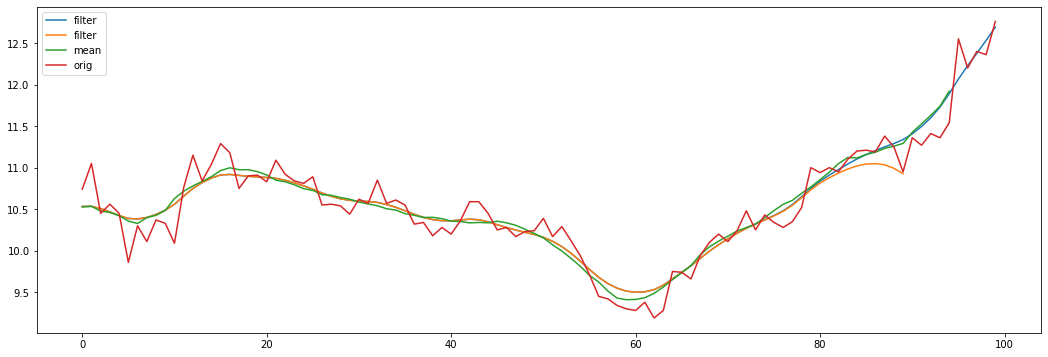

In [73]:
from scipy import signal
data=pd.to_numeric(price['close'])
b, a = signal.butter(1, 0.1, 'lowpass')  
# b1, a1 = signal.butter(8, 0.1, 'lowpass')  
# wn=2*滤波频率/采样频率，如果是五日平均，则采用2*1/5=0.4
meandata=data.rolling(10).mean().shift(-5)
filtedData = signal.filtfilt(b, a, data)       #data为要过滤的信号
filtedData1 = signal.filtfilt(b, a, data[:-10])       #data为要过滤的信号
plt.plot(filtedData[-100:],label='filter')
plt.plot(filtedData1[-90:],label='filter')
plt.plot(meandata.values[-100:],label='mean')
plt.plot(data.values[-100:],label='orig')
plt.legend()